In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("C:\\Users\\hp\\Desktop\\Newdata2\\linkedin-reviews.csv")

In [5]:
df

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4
...,...,...
697,"Can't trust, Going to uninstall just for that ...",1
698,It really gets me linked in with my friends. H...,5
699,It lacks most of what makes the other social n...,4
700,Really disappointed in the new version. Seems ...,2


In [7]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


In [13]:
#exploratory data analysis=>
#we will start by analyzing the distributions of ratings,it will provide insight into the overall sentiment of the reviews. then we can explore further,
#such as analyzing the length of reviews ,and possibly derive insights from the text of the reviews

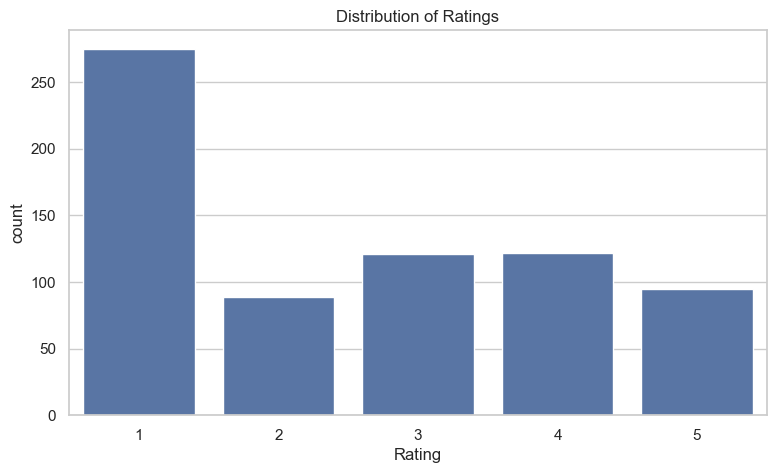

In [17]:
#plotting the distribution of ratings=>
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('count')
plt.show()

In [1]:
#adding sentiment labels in the data=>
#we will use textblob library. textblob provides a polarity scores ranging from -1(very negative) to 1 (very positive) for a given text .
#we can use this score to classify each review's sentiment as positive ,negative or neutral

In [21]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 20.5/626.3 kB 330.3 kB/s eta 0:00:02
   ----- --------------------------------- 81.9/626.3 kB 657.6 kB/s eta 0:00:01
   ------------------------------------- -- 583.7/626.3 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.8 MB/s eta 0:00:00


In [29]:
from textblob import TextBlob

In [5]:
def textblob_sentiment_analysis(review):
    sentiment=TextBlob(review).sentiment
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity <-0.1:
        return "Negative"
    else:
        return "Neutral"

In [37]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

In [39]:
df.sample(5)

,Review,Rating,Sentiment
447,Last update forces close. Was promising up til...,2,Neutral
697,"Can't trust, Going to uninstall just for that ...",1,Negative
558,This is an awesome app & something I can reall...,5,Positive
135,"Very limited, can't see group discussions.",2,Negative
193,Its OK. Needs SD card support bad,4,Negative


In [43]:
#analyzing app reviews sentiments
sentiment_distribution =df['Sentiment'].value_counts()
sentiment_distribution

Sentiment
Negative    396
Positive    295
Neutral      11
Name: count, dtype: int64

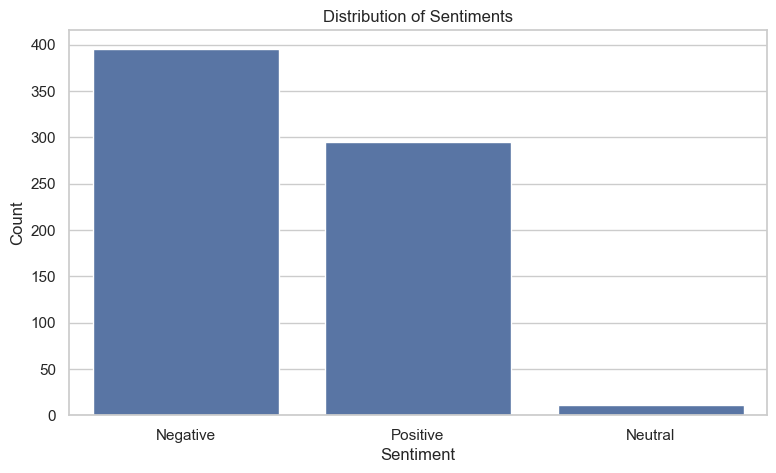

In [45]:
plt.figure(figsize=(9,5))
sns.barplot(x=sentiment_distribution.index,
            y=sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [47]:
#So, we can see althrough the app has low ratings, still the reviewers 
#don't use many negative words in the reviews for the app.

#Next, we'll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether
#there is a correlation between the sentiment of the text and numerical ratings

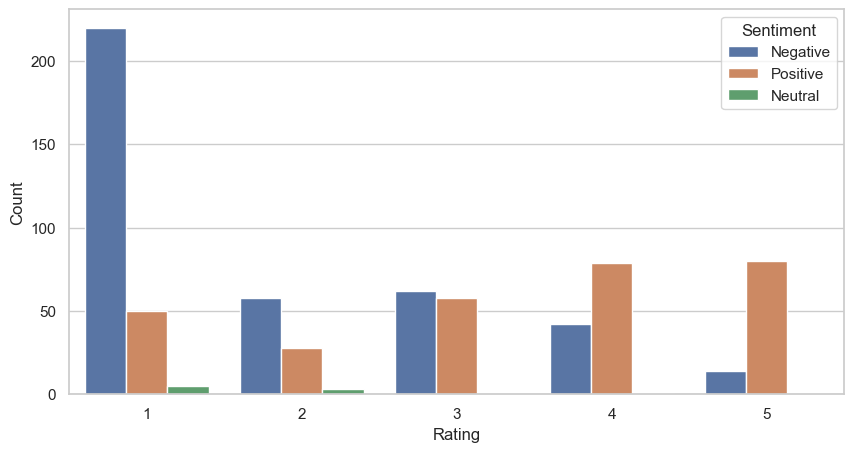

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(data =df,
              x= "Rating",
              hue="Sentiment")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [59]:
#Summary
#App Reviews Sentiment Analysis is a valuable tool for app developers and business to understand user feedback, prioritize feature updates 
#and maintain a positive user community.
#It involves using data analysis tchniques to determine whether the sentiments in these reviews are positive, negative or neutral.